<a href="https://colab.research.google.com/github/ShoryaDubey/ML/blob/main/SVR_Remaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amisha0528/social-network-ads")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/social-network-ads


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [35]:
print(df.columns)

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


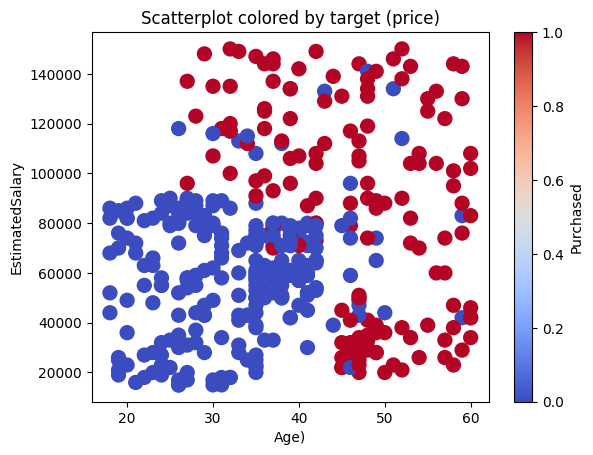

In [36]:
plt.scatter(df["Age"], df["EstimatedSalary"], c=df["Purchased"], cmap="coolwarm", s=100)
plt.xlabel("Age)")
plt.ylabel("EstimatedSalary")
plt.colorbar(label="Purchased")
plt.title("Scatterplot colored by target (price)")
plt.show()


In [16]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1].values

In [17]:
print(X[:10])
print(Y[:10])

   Age  EstimatedSalary
0   -1               -1
1    0               -1
2   -1                0
3   -1                0
4   -1                0
5   -1                0
6   -1                0
7    0                2
8   -1               -1
9    0                0
[0 0 0 0 0 0 0 1 0 0]


In [20]:
sc_age = StandardScaler()
X.iloc[:, 0:1] = sc_age.fit_transform(X.iloc[:, 0:1])
np.set_printoptions(precision=3)
print(X['Age'])

0     -1.474757
1      0.003696
2     -1.474757
3     -1.474757
4     -1.474757
         ...   
395    0.003696
396    1.482149
397    1.482149
398    0.003696
399    1.482149
Name: Age, Length: 400, dtype: float64


In [ ]:
sc_salary = StandardScaler()
X.iloc[:, 1:] = sc_salary.fit_transform(X.iloc[:, 1:])
np.set_printoptions(precision=3)
print(X)

In [26]:
sv = SVR(kernel='rbf')
sv.fit(X, Y)

SVR()

In [27]:
# Transform age and salary separately
age_scaled = sc_age.transform([[19]])
salary_scaled = sc_salary.transform([[85000]])

# Combine into one row
X_test = np.array([[age_scaled[0,0], salary_scaled[0,0]]])

# Predict
y_pred = sv.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [28]:
print(y_pred)

[0.669]


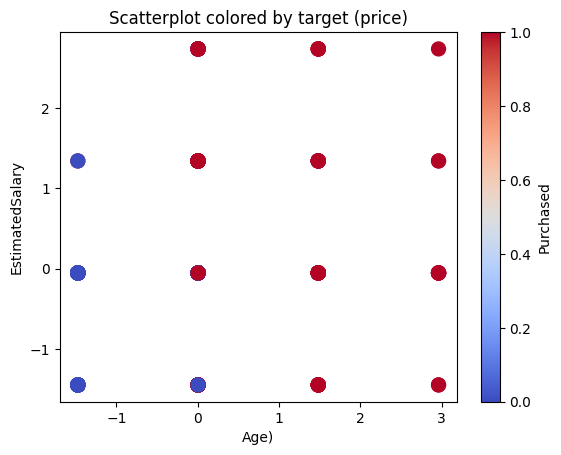

In [32]:
plt.scatter(X["Age"], X["EstimatedSalary"], c=X["Purchased"], cmap="coolwarm", s=100)
plt.xlabel("Age)")
plt.ylabel("EstimatedSalary")
plt.colorbar(label="Purchased")
plt.title("Scatterplot colored by target (price)")
plt.show()

